# Pymaceuticals Inc.
---

### Analysis

- Overall, these findings underscore the positive impact of Capomulin on tumor reduction.  Capomulin was the most extensively tested drug in this study, and it appears to be a reliably effective treatment regimen.  Random line graphs depicting individual mice treated with Capomulin consistently demonstrate a downward trend in tumor volume, reflecting the drug's effectiveness.  

- While the median final tumor volume is slightly higher than it is for Ramicane, that statistic does not factor in mouse weight.  Notably, linear regression analysis indicates a robust correlation between mouse weight and tumor volume, perhaps negating the significance of the higher median tumor volume with Capomulin treatment.  Further analysis reveals that the IQR spread for Capomulin is smaller and more uniform than for any other treatment.  This encouraging observation indicates the drug's potential for providing a reliably beneficial impact on tumor reduction.

In [74]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import random

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
unique_mouse_count = df['Mouse ID'].nunique()
unique_mouse_count

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
columns_to_check = ['Mouse ID', 'Timepoint']
duplicates = df[df.duplicated(subset=columns_to_check, keep=False)]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_clean = df.drop_duplicates(subset=columns_to_check)
df_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Checking the number of mice in the clean DataFrame.

df_clean = df
num_mice = df['Mouse ID'].nunique()
print(f"Number of mice in the clean DataFrame: {num_mice}")

Number of mice in the clean DataFrame: 249


## Summary Statistics

In [20]:
# Define the summary statistics functions
summary_functions = {
    'Mean Tumor Volume': 'mean',
    'Median Tumor Volume': 'median',
    'Tumor Volume Variance': 'var',
    'Tumor Volume Std. Dev.': 'std',
    'Tumor Volume Std. Err.': 'sem'
}

# Use groupby and agg to calculate summary statistics for each drug regimen
summary_df = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(**summary_functions)

# Display the summary statistics DataFrame
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


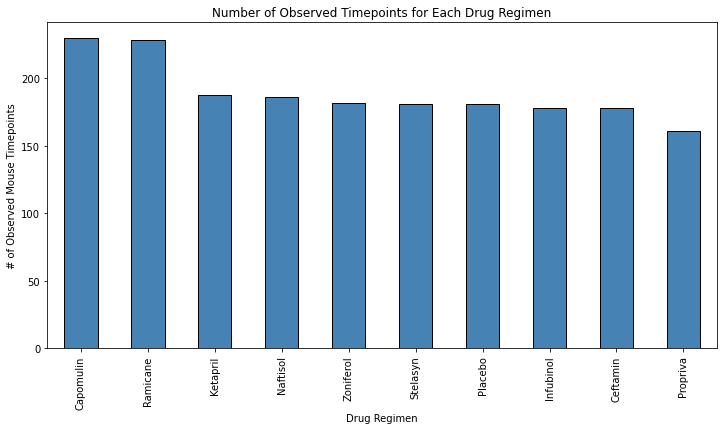

In [33]:
# Group the data by Drug Regimen and count the number of rows by Mouse ID/Timepoints
timepoint_counts = df.groupby('Drug Regimen').count()['Mouse ID']

# Sort the values in descending order
timepoint_counts_sorted = timepoint_counts.sort_values(ascending=False)

# Create a bar plot
timepoint_counts_sorted.plot(kind='bar', color='steelblue', edgecolor='black', figsize=(12, 6))

# Set plot labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Number of Observed Timepoints for Each Drug Regimen')

# Display the plot
plt.show()

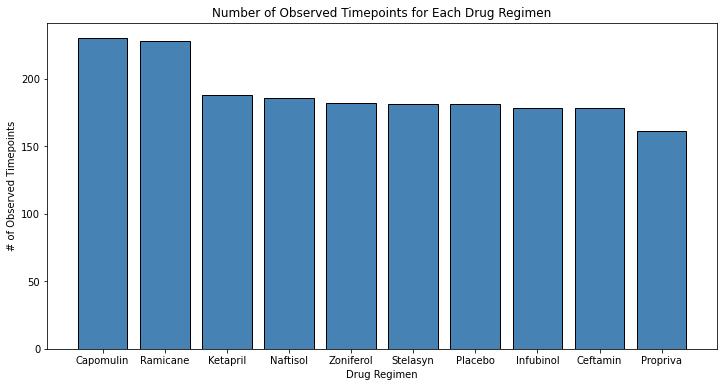

In [32]:
# Group the data by Drug Regimen and count the number of rows by Mouse ID/Timepoints
timepoint_counts = df.groupby('Drug Regimen').count()['Mouse ID']

# Sort the values in descending order
timepoint_counts_sorted = timepoint_counts.sort_values(ascending=False)

# Create a bar plot using Matplotlib pyplot
plt.figure(figsize=(12, 6))
plt.bar(timepoint_counts_sorted.index, timepoint_counts_sorted, color='steelblue', edgecolor='black')

# Set plot labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Timepoints')
plt.title('Number of Observed Timepoints for Each Drug Regimen')

# Display the plot
plt.show()

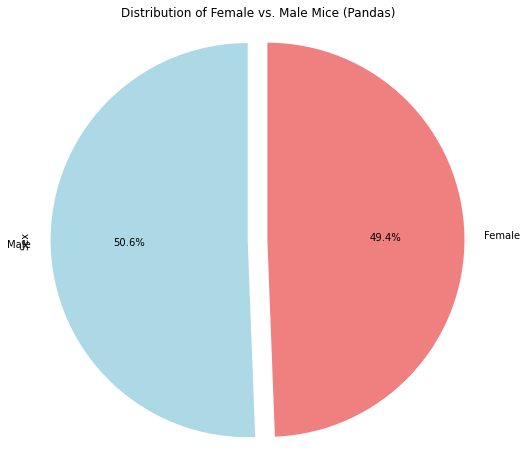

In [36]:
# Count the number of male and female mice
gender_distribution = df['Sex'].value_counts()

# Create the first pie chart using Pandas DataFrame.plot() method
plt.figure(figsize=(8, 8))
gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], explode=(0, 0.1), startangle=90)
plt.title('Distribution of Female vs. Male Mice (Pandas)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

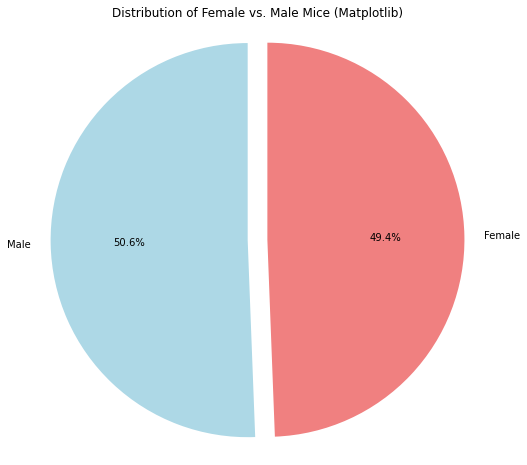

In [35]:
# Count the number of male and female mice
gender_distribution = df['Sex'].value_counts()

# Create the second pie chart using Matplotlib's pyplot methods
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], explode=(0, 0.1), startangle=90)
plt.title('Distribution of Female vs. Male Mice (Matplotlib)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

## Quartiles, Outliers and Boxplots

In [42]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_df = pd.merge(last_timepoint_df, df, on=['Mouse ID', 'Timepoint'], how='left')

last_timepoint_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [41]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Loop through each treatment
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset_df = last_timepoint_df[last_timepoint_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Add subset to the list
    tumor_volume_data.append(subset_df)

    # Calculate the IQR and quantitatively determine if there are any potential outliers
    quartiles = subset_df.quantile([0.25, 0.5, 0.75])
    lower_bound = quartiles[0.25] - 1.5 * (quartiles[0.75] - quartiles[0.25])
    upper_bound = quartiles[0.75] + 1.5 * (quartiles[0.75] - quartiles[0.25])
    
    # Determine outliers using upper and lower bounds
    outliers = subset_df[(subset_df < lower_bound) | (subset_df > upper_bound)]
    
    # Print the results
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


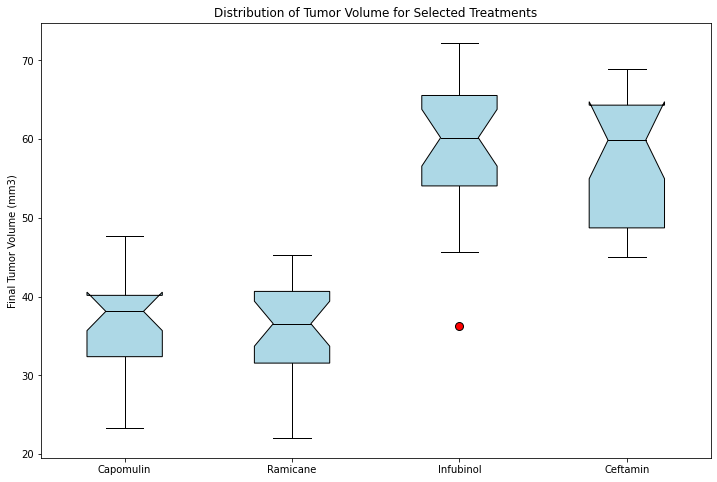

In [47]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.figure(figsize=(12, 8))
plt.boxplot(
    tumor_volume_data,
    labels=treatments,
    flierprops=dict(marker='o', markerfacecolor='red', markersize=8),
    notch=True,  # Adds a notch to the box plot
    patch_artist=True,  # Fills the box with color
    boxprops=dict(facecolor='lightblue', color='black'),  # Sets box color and outline color
    capprops=dict(color='black'),  # Sets color of the caps on whiskers
    whiskerprops=dict(color='black'),  # Sets color of the whiskers
    medianprops=dict(color='black')  # Sets color of the median line
)

plt.title('Distribution of Tumor Volume for Selected Treatments')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

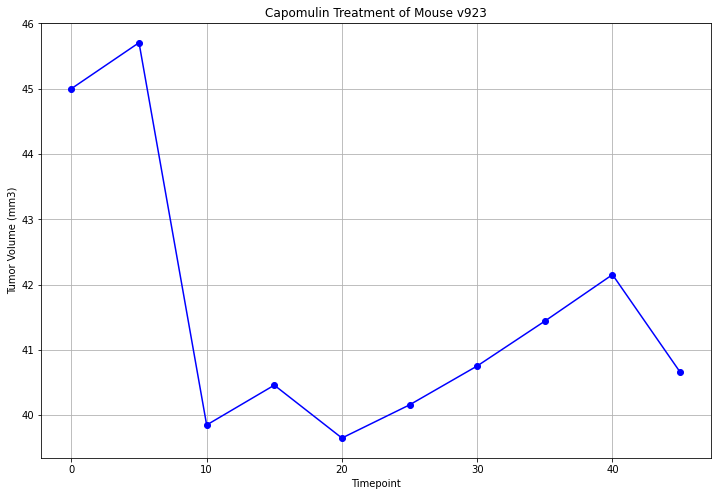

In [94]:
# Filter data for Capomulin regimen
capomulin_data = df[df['Drug Regimen'] == 'Capomulin']

# Choose a random mouse ID from the Capomulin data
random_mouse_id = random.choice(capomulin_data['Mouse ID'].unique())

# Filter data for the randomly selected mouse treated with Capomulin
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == random_mouse_id]

# Generate a line plot for tumor volume versus time point
plt.figure(figsize=(12, 8))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='b')

# Add labels and title
plt.title(f'Capomulin Treatment of Mouse {random_mouse_id}')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

# Display the plot
plt.grid(True)
plt.show()

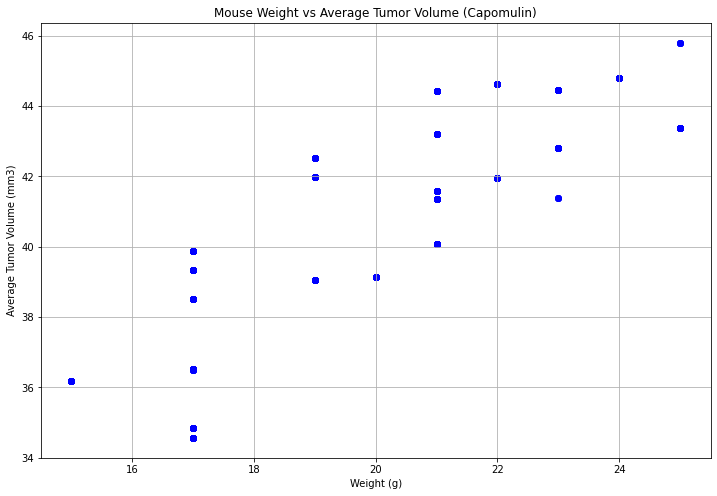

In [71]:
# Filter data for Capomulin regimen
capomulin_data = df[df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge average tumor volume with the original Capomulin data to include weight
merged_data = pd.merge(capomulin_data, average_tumor_volume, on='Mouse ID', suffixes=('_original', '_average'))

# Generate a scatter plot of mouse weight versus average observed tumor volume
plt.figure(figsize=(12, 8))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)_average'], color='b', marker='o')

# Add labels and title
plt.title('Mouse Weight vs Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.grid(True)
plt.show()

## Correlation and Regression

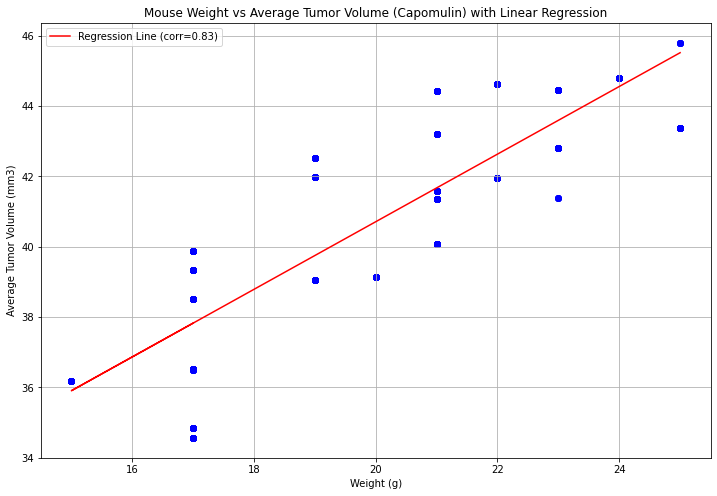

In [75]:
# Filter data for Capomulin regimen
capomulin_data = df[df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge average tumor volume with the original Capomulin data to include weight
merged_data = pd.merge(capomulin_data, average_tumor_volume, on='Mouse ID', suffixes=('_original', '_average'))

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation_coefficient = merged_data['Weight (g)'].corr(merged_data['Tumor Volume (mm3)_average'])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)_average'])

# Generate a scatter plot of mouse weight versus average observed tumor volume
plt.figure(figsize=(12, 8))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)_average'], color='b', marker='o')

# Plot the linear regression line on top of the scatter plot
plt.plot(merged_data['Weight (g)'], slope * merged_data['Weight (g)'] + intercept, color='r', label=f'Regression Line (corr={correlation_coefficient:.2f})')

# Add labels and title
plt.title('Mouse Weight vs Average Tumor Volume (Capomulin) with Linear Regression')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

In [76]:
# Regression Analysis

print("There is a strong predictive correlation between mouse weight and tumor volume for mice treated with Capomulin.")

There is a strong predictive correlation between mouse weight and tumor volume for mice treated with Capomulin.
